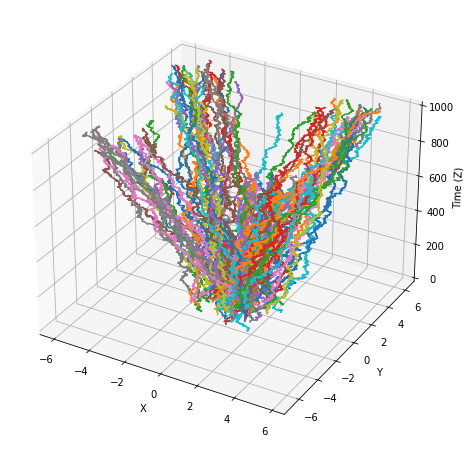

In [40]:
# 导入必要的库
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 步骤1：加载张量文件
bridge_tensor = torch.load('experiments/gaussian2d/pred_bridge.pt')
# bridge_tensor = bridge_tensor[::5, ::2, :]
# 步骤2：提取x、y、z的坐标
x = bridge_tensor[:, :, 0].numpy()
y = bridge_tensor[:, :, 1].numpy()
z = torch.arange(bridge_tensor.size(0)).numpy()

# 步骤3：绘制三维图像
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 循环绘制每一条线
for i in range(bridge_tensor.size(1)):
    ax.plot(x[:, i], y[:, i], z)

# 设置轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Time (Z)')

plt.show()


In [41]:
bridge_tensor.shape

torch.Size([1001, 100, 2])

In [42]:
# # 导入Plotly库
import plotly.graph_objects as go

def draw_3d_line(bridge_tensor, sample_rate=1, time_rate=1):
    assert sample_rate > 0 and sample_rate <= 1 and time_rate > 0 and time_rate <= 1, "sample_rate and time_rate must be in (0, 1]"
    if sample_rate <= 1:
        bridge_tensor = bridge_tensor[:, ::int(1/sample_rate), :]
    if time_rate <= 1:
        bridge_tensor = bridge_tensor[::int(1/time_rate), :, :]
    
    def get_color(point):
        x, y = point
        if x > 0 and y > 0:
            return 0
        elif x > 0 and y < 0:
            return 1
        elif x < 0 and y > 0:
            return 2
        else:
            return 3
        
    colors = ['#F9ED69', '#F08A5D', '#B83B5E', '#6A2C70']  # 对应于目标均值的颜色
    
    # 创建一个存储线条的列表
    lines = []
    x = bridge_tensor[:, :, 0].numpy()
    y = bridge_tensor[:, :, 1].numpy()
    z = torch.arange(bridge_tensor.size(0)).numpy()
    # 循环添加每一条线
    for i in range(bridge_tensor.size(1)):
        c = colors[get_color((x[-1, i], y[-1, i]))]
        line = go.Scatter3d(
            z=z, y=y[:, i], x=x[:, i],
        marker=dict(
            size=2,
            color=c,
            colorscale='Viridis',
            opacity=0.5
        ),
        line=dict(
            width=2, 
            color=c,
        )                    
        )
        lines.append(line)

    # 创建3D图形
    fig = go.Figure(data=lines)

    # 设置轴标签
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Time (Z)',
        ),
        margin=dict(l=1, r=1, t=1, b=1),
        paper_bgcolor="#efefef",
    )

    # 显示图形
    fig.show()

In [43]:
draw_3d_line(bridge_tensor, sample_rate=1, time_rate=0.2)